# Data Science Project example: Model (Regression and XGBoost)

The objective of this example is quantitative assessement of the effect of external factors on beer sales. The (artifical) dataset 'Beverage sales data.csv'contains the follwoing values for each day of 2019:

* Number of crates of beers sold
* Hours of daylight
* Public holiday (0 or 1)
* Mean temperature in °C

### Quantitatively assess the impact of these factors on beer sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = None

In [2]:
# Set working directory
import os
os.getcwd() # get working directory 
os.chdir('/Users/vinaykumar/Documents/Python_scripts/sales analysis/') 

In [3]:
##laod data and make a copy
data1 = pd.read_csv('Beverage sales data.csv')
data = data1.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               365 non-null    object 
 1   crates_sold        365 non-null    int64  
 2   hours_of_daylight  365 non-null    float64
 3   public_holiday     365 non-null    int64  
 4   mean_temperature   365 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.4+ KB


In [5]:
data.shape

(365, 5)

In [6]:
data.head()

,date,crates_sold,hours_of_daylight,public_holiday,mean_temperature
0,2019-01-01,553,7.7,1,6.4
1,2019-01-02,479,7.8,0,1.6
2,2019-01-03,485,7.8,0,-0.8
3,2019-01-04,484,7.8,0,1.6
4,2019-01-05,512,7.8,0,5.5


In [7]:
## convert date to datetime 
data['date'] =  pd.to_datetime(data['date'],format = '%Y-%m-%d')

In [8]:
### length of data: one year
min(data.date),max(data.date)

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

## Lets fit a statsmodel regression model 
###### on 11 months training data and keep 1 month as test data with hours of day light feature

In [9]:
import statsmodels.api as sm

train = data[data.date <= '2019-11-30']
test = data[data.date > '2019-11-30']

X = train[['hours_of_daylight', 'public_holiday','mean_temperature']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = train['crates_sold']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            crates_sold   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     826.6
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          4.55e-153
Time:                        23:37:32   Log-Likelihood:                -1613.1
No. Observations:                 334   AIC:                             3234.
Df Residuals:                     330   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               481.1565      8.82

### Fit regression model without 'hours_of_daylight' model

In [10]:
import statsmodels.api as sm

train = data[data.date <= '2019-11-30']
test = data[data.date > '2019-11-30']

X = train[['public_holiday','mean_temperature']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = train['crates_sold']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            crates_sold   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1240.
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          1.69e-154
Time:                        23:37:32   Log-Likelihood:                -1613.5
No. Observations:                 334   AIC:                             3233.
Df Residuals:                     331   BIC:                             3244.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              488.4354      3.217  

1. First most important point we can observe is that model **without hours_of_daylight(adj.R Square .88)** is as good as model **with hours_of_daylight variable(adj.R Square .88).** We can select model without hours_of_daylight and put into production 
2. Statsmodel provide good insights into the model in terms of variable significance for each variable
3. As per model output, all features and constant term are significant at 5% level of significance except hours of daylight which is significant 10% level of significance.
4. Each parameter coefficinet std error is also low which is a good indicator of model accuracy vis-a-vis relationship  between sales and factors

## Lets fit  a sklearn regression model using

In [11]:
### fit linear model to analyse the impact of factors on beer sales
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X =  data[['hours_of_daylight', 'public_holiday',
       'mean_temperature']]
y  = data['crates_sold']

### drop duplicates and sort data with data
data = data.drop_duplicates(keep = 'first')
data = data.sort_values(by= 'date')
data.shape

(365, 5)

In [12]:
### train and test data
train = data[data.date <= '2019-11-30']
test = data[data.date > '2019-11-30']

X_train =  train[['public_holiday','mean_temperature']]

y_train =  train[['crates_sold']]

X_test = test[['public_holiday','mean_temperature']]

y_test = test[['crates_sold']]

In [13]:
## fit the model
regr =  linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
## intercept and Parameter estimates
regr.intercept_ ,regr.coef_

(array([488.43538773]), array([[56.36169846, 11.39923692]]))

In [15]:
## predict the test set
prediction =  regr.predict(X_test)

In [16]:
## coefficients of model parameters
coeff_df = pd.DataFrame(regr.coef_, columns=X_train.columns).transpose()
coeff_df = coeff_df.rename(columns={0:'Coefficient'})
coeff_df

,Coefficient
public_holiday,56.361698
mean_temperature,11.399237


In [17]:
## model accuracy metrics
print('Mean Absolute Error:', mean_absolute_error(y_test, regr.predict(X_test)))  
print('Mean Squared Error:', mean_squared_error(y_test, regr.predict(X_test)))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, regr.predict(X_test))))

Mean Absolute Error: 48.47631312475253
Mean Squared Error: 3042.0369023101525
Root Mean Squared Error: 55.154663468379105


### conclusion
Based on the correlation results and regression models of sklearn and statsmodel it can be concluded that there is significant quantitative relationship between factors average temperature, public holiday and beer sales

## Lets  be little imaginative, find and quantitatively assess other factors affecting beer sales, i.e. factors that can possibly explain variance in sales of beer

* Day of month could be important feature to give insight on different sales pattern for different days of month
* Day of year could be important feature to give insight on different sales pattern for different days of year
* Weekday could be important feature to give insight on different sales pattern for different weekdays
* Month of year could be important feature to give insight on different sales pattern for different months

In [18]:
data['Day'] = data['date'].dt.day

In [19]:
data['DayofYear'] = data['date'].dt.dayofyear

In [20]:
data['Weekday'] = data['date'].dt.dayofweek

In [21]:
data['Month'] = data['date'].dt.month

* Previous days sales known as lags, can impact the sales on current days sales. Lets create lag 1 to 7, 14, 21 and 28 to get information into model from previous days sales.

In [22]:
## create feature lags
data['lag1'] = data['crates_sold'].shift(1)
data['lag2'] = data['crates_sold'].shift(2)
data['lag3'] = data['crates_sold'].shift(3)
data['lag4'] = data['crates_sold'].shift(4)
data['lag5'] = data['crates_sold'].shift(5)
data['lag6'] = data['crates_sold'].shift(6)

In [23]:
data['lag7'] = data['crates_sold'].shift(7)
data['lag14'] = data['crates_sold'].shift(14)
data['lag21'] = data['crates_sold'].shift(21)
data['lag28'] = data['crates_sold'].shift(28)

* Difference between two lags of same day could also be significant to the model

In [24]:
data['lag7_14'] = data['lag14'] - data['lag7']

* create dow moving average - 2,3 and 4 days 

In [25]:
### create dow moving average
data['ma2'] = data.groupby('Weekday')['crates_sold'].transform(lambda x: x.rolling(window=2).mean().shift(1))
data['ma3'] = data.groupby('Weekday')['crates_sold'].transform(lambda x: x.rolling(window=3).mean().shift(1))
data['ma4'] = data.groupby('Weekday')['crates_sold'].transform(lambda x: x.rolling(window=4).mean().shift(1))

In [26]:
#### analyse the correlation between beer sales and factors
corr_data =  data[['crates_sold', 'public_holiday',
       'mean_temperature', 'Day', 'DayofYear', 'Weekday', 'Month', 'lag1',
       'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag14', 'lag21',
       'lag28', 'ma2', 'ma3', 'ma4']]
corr_sales = corr_data.corr()['crates_sold'].abs()
columns = corr_sales[corr_sales >.01].index
corr_sales = corr_sales.filter(columns).sort_values()
corr_sales =  pd.DataFrame(corr_sales)
corr_sales = corr_sales.reset_index()
corr_sales =  corr_sales.rename(columns={'index':'features','crates_sold':'corr'})

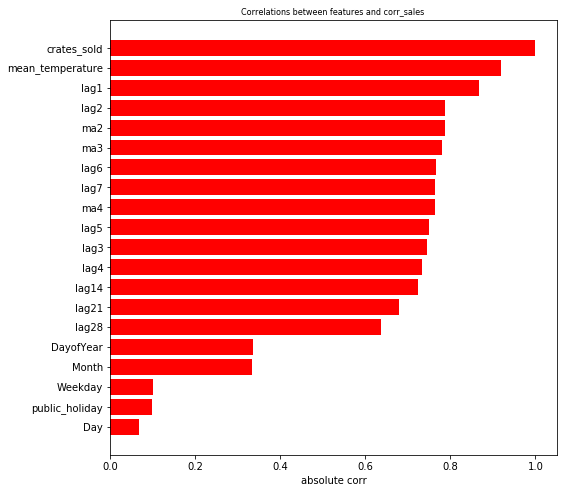

In [27]:
## plot correlation
ind = np.arange(corr_sales.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,8))
rects = ax.barh(ind, corr_sales['corr'].values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_sales.features.values, rotation='horizontal')
ax.set_xlabel("absolute corr", fontsize = 10)
ax.set_title("Correlations between features and corr_sales ", fontsize = 8)
plt.show()

In [28]:
## make a copy of data
data = data.fillna(0).copy()

In [29]:
### split the data into train and test to train model with additional features
train = data[data.date <= '2019-11-30']
test = data[data.date > '2019-11-30']

X_train =  train[['public_holiday',
       'mean_temperature', 'Month', 'Day', 'DayofYear', 'Weekday', 'lag1',
       'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag14', 'lag7_14',
       'lag21', 'lag28', 'ma2', 'ma3', 'ma4']]

y_train =  train[['crates_sold']]

X_test = test[[ 'public_holiday',
       'mean_temperature', 'Month', 'Day', 'DayofYear', 'Weekday', 'lag1',
       'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag14', 'lag7_14',
       'lag21', 'lag28', 'ma2', 'ma3', 'ma4']]

y_test = test[['crates_sold']]

In [30]:
## fit the model
model =  linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
## model parameter estimates
model.intercept_ ,model.coef_

(array([155.52259514]),
 array([[ 6.14272977e+01,  9.68217001e+00,  2.95383651e+02,
          9.58365210e+00, -9.64863195e+00,  2.36944369e+00,
          8.14852165e-02, -5.18262207e-02, -4.26555508e-02,
         -3.63119159e-02, -4.40741412e-02,  4.65766299e-02,
          4.95727847e-02,  1.08610687e-02, -6.12723805e-03,
          3.64739944e-02, -6.80198205e-03,  1.39246882e-02,
         -5.70672078e-02,  5.84549835e-02]]))

In [32]:
# print model coeffients
coeff_df = pd.DataFrame(model.coef_, columns=X_train.columns).transpose()
coeff_df = coeff_df.rename(columns={0:'Coefficient'})
coeff_df

,Coefficient
public_holiday,61.427298
mean_temperature,9.682170
Month,295.383651
Day,9.583652
DayofYear,-9.648632
Weekday,2.369444
lag1,0.081485
lag2,-0.051826
lag3,-0.042656
lag4,-0.036312


In [33]:
## concate actual and predicted sales
df = pd.concat([y_test.reset_index(drop=True).rename(columns={'crates_sold':'actual'}), pd.DataFrame(model.predict(X_test)).rename(columns={0:'y_pred'})], axis = 1)
df.head()

,actual,y_pred
0,562,536.645984
1,564,535.134499
2,537,532.873111
3,580,552.842363
4,534,533.586314


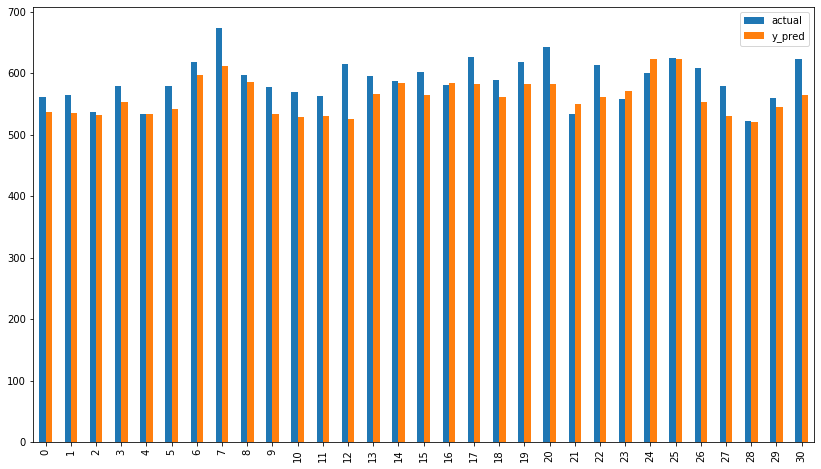

In [34]:
##plot actual vs predicted
df1 = df.copy()
df1.plot(kind='bar',figsize=(14,8))

## Bonus: lets also fit XGboost model regressor to get some more insights about important features

In [35]:
###### import Xgboost library and create model
import xgboost as xgb
mxgb = xgb.XGBRegressor()

In [36]:
# fit model
mxgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Model performance

In [37]:
# print model error metrics 
print('Mean Absolute Error:', mean_absolute_error(y_test, mxgb.predict(X_test)))  
print('Mean Squared Error:', mean_squared_error(y_test, mxgb.predict(X_test)))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, mxgb.predict(X_test))))

Mean Absolute Error: 34.36351456180696
Mean Squared Error: 1697.3048544975238
Root Mean Squared Error: 41.19835985203202


* XGboost has very nice feature of showing importance of all the feature in model and indentify significant variables

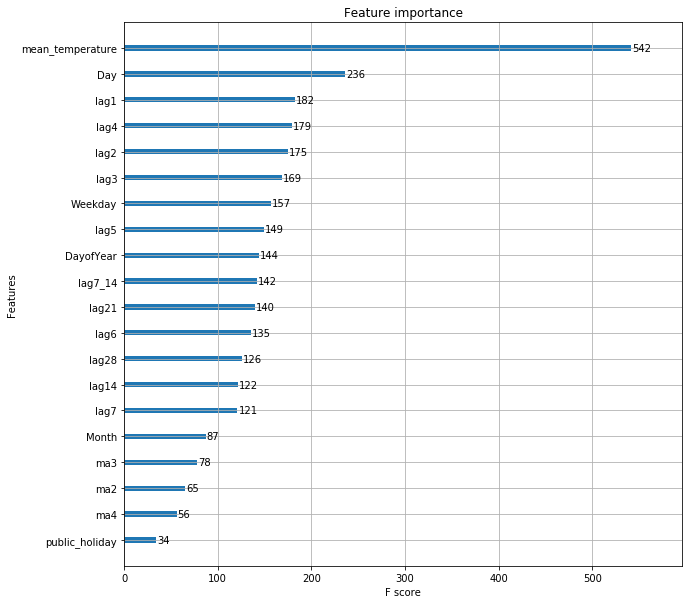

In [38]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(mxgb, max_num_features=20, ax=ax)

* It is very interestnig to observe that **average temperature is again most significant feature as it was in regression model along with other variables in the list like day of the month, few lags and weekday in Xgboost Model.**
* So finally we found other features that are effecting beer sales singnificantly